In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df =pd.read_csv("./heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [46]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [48]:
df.tail(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [49]:
df["target"].unique()

array([0, 1])

In [50]:
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

<Axes: >

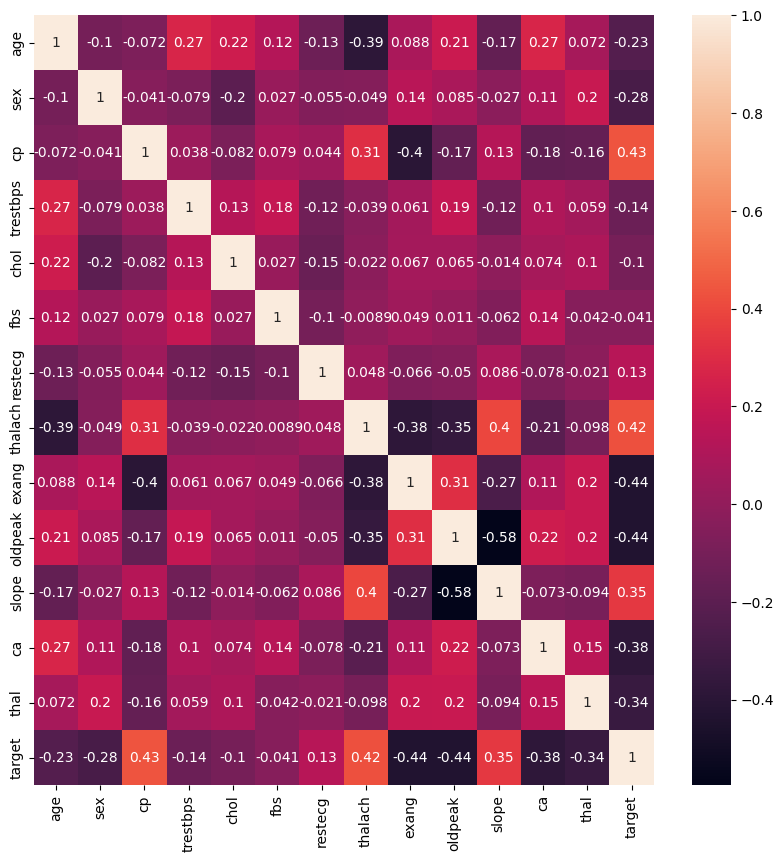

In [51]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

In [52]:
# sex, cp, thalach, exang, slope, ca, thal
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SequentialFeatureSelector

#
sfs = SequentialFeatureSelector(LogisticRegression(), direction="backward")

# 
X = df.drop(columns=["target"])
y = df["target"]

#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=614)

sfs.fit(X_train, y_train)

c:\Users\07020\Dev\curso_ml\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\07020\Dev\curso_ml\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

SequentialFeatureSelector(direction='backward', estimator=LogisticRegression())

In [53]:

sfs.get_feature_names_out()


array(['sex', 'cp', 'restecg', 'thalach', 'oldpeak', 'ca', 'thal'],
      dtype=object)

In [54]:
def show_metrics(y, y_pred):
    accuracy = accuracy_score(y, y_pred)
    print(f"Exactitud: {accuracy:.4f}")
    print("Reporte de clasificación")
    print(classification_report(y, y_pred))
    

def plot_confusion(y, y_pred, name=None):
    conf_mat = confusion_matrix(y, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="g")
    plt.xlabel("Predicción")
    plt.ylabel("Verdaderos")
    if name:
        plt.title(f"Results of {name}")
        

def get_name(model):
    return model.__class__.__name__

In [55]:
features = ['sex', 'cp', 'fbs', 'exang', 'oldpeak', 'ca']

X = df[features]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=614)

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

Exactitud: 0.7854
Reporte de clasificación
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        94
           1       0.81      0.79      0.80       111

    accuracy                           0.79       205
   macro avg       0.78      0.78      0.78       205
weighted avg       0.79      0.79      0.79       205



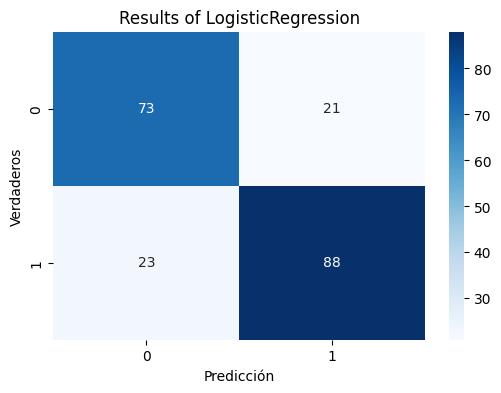

In [56]:
y_pred = clf.predict(X_test)

show_metrics(y_test, y_pred)
plot_confusion(y_test, y_pred, get_name(clf))

Exactitud: 0.8049
Reporte de clasificación
              precision    recall  f1-score   support

           0       0.81      0.76      0.78        94
           1       0.80      0.85      0.82       111

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.80      0.80      0.80       205



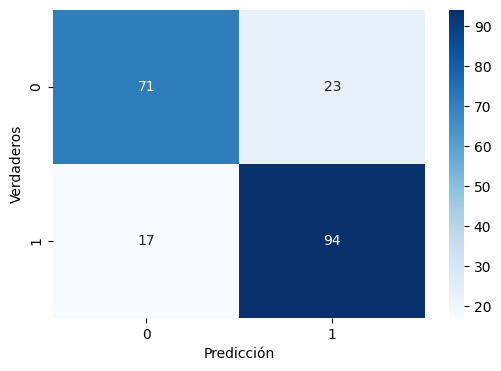

In [57]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

show_metrics(y_test, y_pred)
plot_confusion(y_test, y_pred)

Exactitud: 0.8195
Reporte de clasificación
              precision    recall  f1-score   support

           0       0.84      0.76      0.79        94
           1       0.81      0.87      0.84       111

    accuracy                           0.82       205
   macro avg       0.82      0.81      0.82       205
weighted avg       0.82      0.82      0.82       205



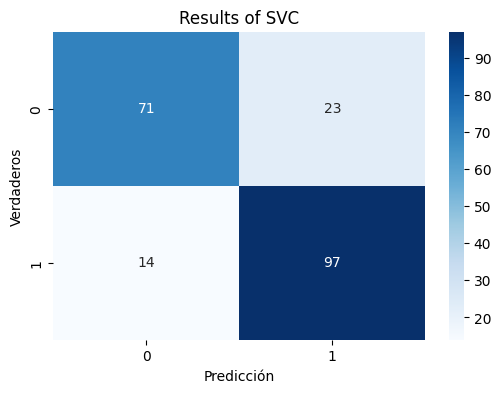

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = X_train.copy()
X_test_std = X_test.copy()


scaling_col = ["oldpeak"]
X_train_std[scaling_col] = scaler.fit_transform(X_train[scaling_col])
X_test_std[scaling_col] = scaler.transform(X_test[scaling_col])

clf = SVC()
clf.fit(X_train_std, y_train)

y_pred = clf.predict(X_test_std)
show_metrics(y_test, y_pred)
plot_confusion(y_test, y_pred, get_name(clf))

Exactitud: 0.8293
Reporte de clasificación
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        94
           1       0.83      0.86      0.84       111

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



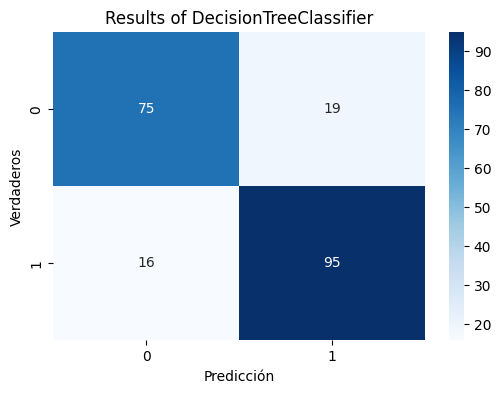

In [59]:
# Instanciamos el árbol
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1)

# Entrenar
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

show_metrics(y_test, y_pred)
plot_confusion(y_test, y_pred, get_name(clf))

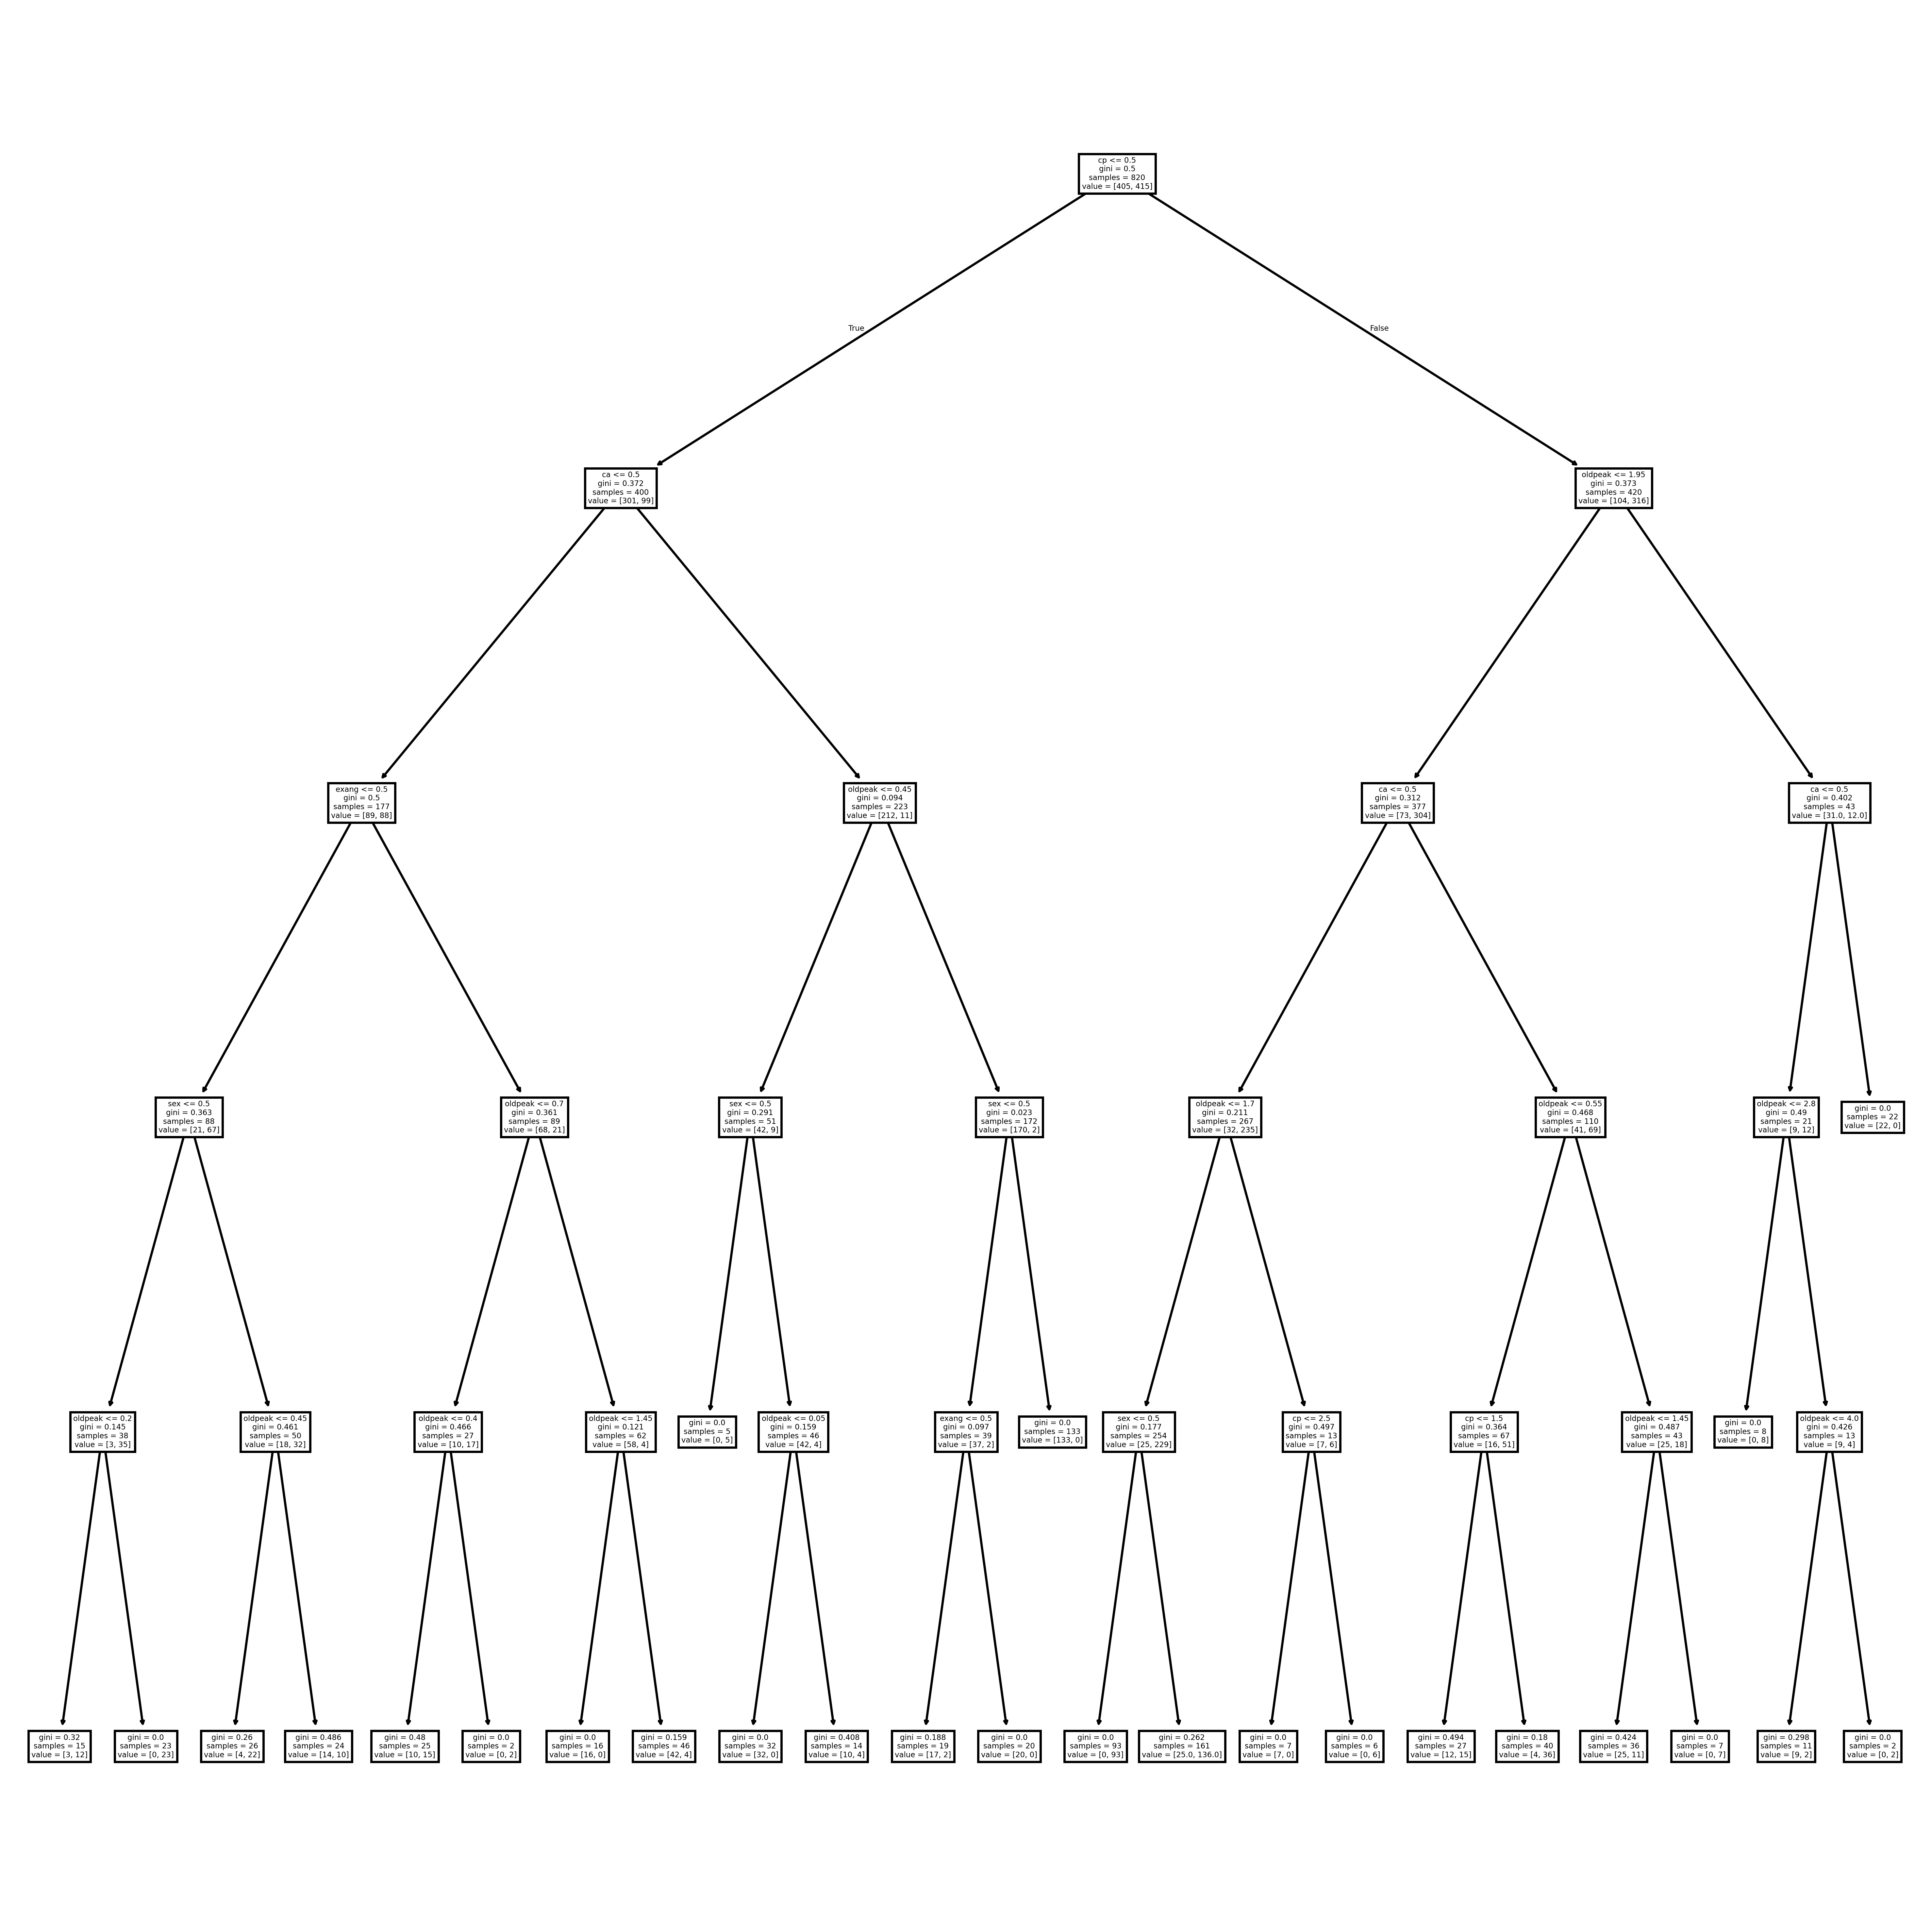

In [60]:
fig = plt.figure(figsize=(15, 15), dpi=500)
plot_tree(clf, feature_names=X_test.columns.values);

Exactitud: 0.8927
Reporte de clasificación
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        94
           1       0.83      1.00      0.91       111

    accuracy                           0.89       205
   macro avg       0.92      0.88      0.89       205
weighted avg       0.91      0.89      0.89       205



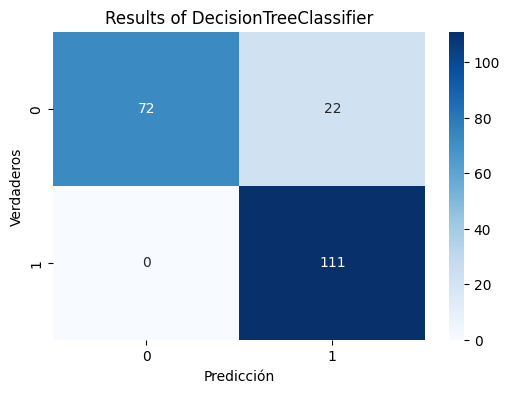

In [61]:
clf = DecisionTreeClassifier(max_depth=7, min_samples_leaf=1, class_weight={0:1, 1:4})

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

show_metrics(y_test, y_pred)
plot_confusion(y_test, y_pred, get_name(clf))

Exactitud: 0.9171
Reporte de clasificación
              precision    recall  f1-score   support

           0       0.96      0.85      0.90        94
           1       0.89      0.97      0.93       111

    accuracy                           0.92       205
   macro avg       0.92      0.91      0.92       205
weighted avg       0.92      0.92      0.92       205



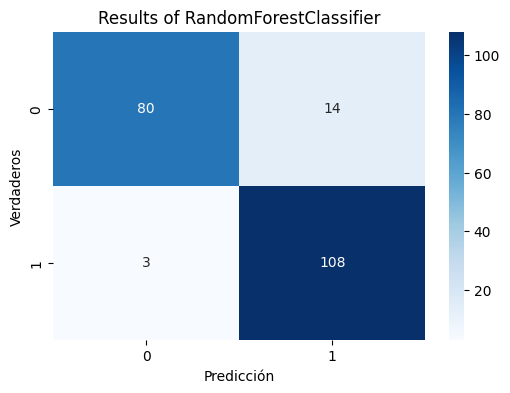

In [62]:
# Hacemos el bosque

features = ["sex", "cp", "thalach", "exang", "slope", "ca", "thal"]
X = df[features]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=614)


# Instanciamos el modelo
clf = RandomForestClassifier(max_depth=7, min_samples_leaf=1, class_weight={0: 1, 1: 3})

# Entrenamos
clf.fit(X_train, y_train)

# Clasificamos y observamos
y_pred = clf.predict(X_test)
show_metrics(y_test, y_pred)
plot_confusion(y_test, y_pred, get_name(clf))

Exactitud: 0.9707
Reporte de clasificación
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        94
           1       0.98      0.96      0.97       111

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



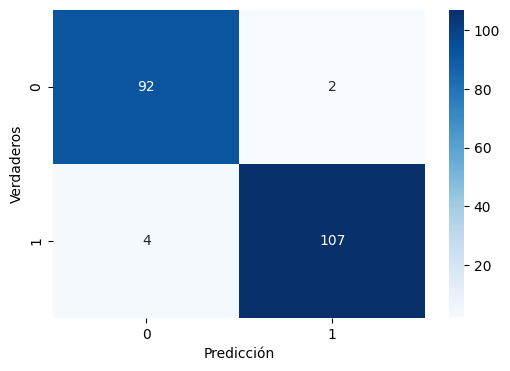

In [63]:
import xgboost as xgb


clf = xgb.XGBClassifier(max_depth=5, n_estimators=50)
clf.fit(X_train, y_train)

# Clas
y_pred = clf.predict(X_test)
show_metrics(y_test, y_pred)
plot_confusion(y_test, y_pred)

Exactitud: 0.9756
Reporte de clasificación
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        94
           1       0.98      0.97      0.98       111

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



c:\Users\07020\Dev\curso_ml\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


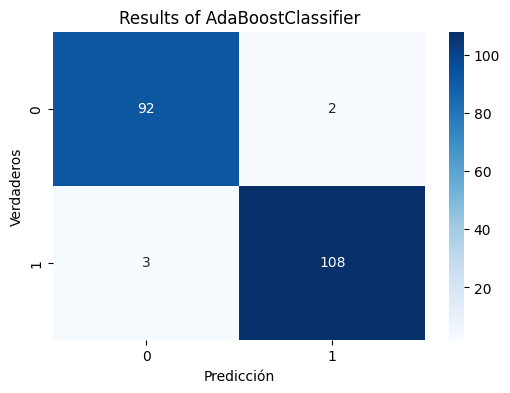

In [64]:
from sklearn.ensemble import AdaBoostClassifier


clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, min_samples_leaf=1), n_estimators=40)
clf.fit(X_train, y_train)

# Clasificamos y observamos
y_pred = clf.predict(X_test)
show_metrics(y_test, y_pred)
plot_confusion(y_test, y_pred, get_name(clf))